In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/New_FYP"

Mounted at /content/drive
Model  Test  Testing  Training	Validation


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define paths to the datasets
train_dir = '/content/drive/My Drive/New_FYP/Training'
validation_dir = '/content/drive/My Drive/New_FYP/Validation'
test_dir = '/content/drive/My Drive/New_FYP/Testing'

# Set parameters
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 90

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_test_datagen.flow_from_directory(validation_dir, target_size=(img_width, img_height),
                                                                  batch_size=batch_size, class_mode='categorical')

# Build the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callback
history = model.fit(train_generator, steps_per_epoch=max(1, train_generator.samples // batch_size),
                    epochs=epochs, validation_data=validation_generator,
                    validation_steps=max(1, validation_generator.samples // batch_size),
                    callbacks=[reduce_lr])

# Save the class indices to use for later predictions
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Evaluate on the test set
test_generator = validation_test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                                             batch_size=batch_size, class_mode='categorical', shuffle=False)

# Make sure we predict on all images
steps = test_generator.samples // batch_size + (test_generator.samples % batch_size > 0)
predictions = model.predict(test_generator, steps=steps)

# Convert predictions to class names
predicted_classes_indices = np.argmax(predictions, axis=1)
predicted_classes_names = [index_to_class[idx] for idx in predicted_classes_indices]

# Output the predictions for each test image
for i in range(len(predicted_classes_names)):
    # Get the file path for the current index
    file_path = test_generator.filepaths[i % len(test_generator.filepaths)]
    print(f"Image: {file_path.split('/')[-1]} - Class: {predicted_classes_names[i]}")

# Print the test accuracy
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy}")

Found 2520 images belonging to 6 classes.
Found 360 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                       

In [3]:
for i, prediction in enumerate(predictions):
    print(f"Image {i}:")
    for class_index, prob in enumerate(prediction):
        class_name = index_to_class[class_index]  # Get the class name using the index_to_class dictionary
        print(f"    {class_name}: {prob*100:.2f}%")
    print("\n")

Streaming output truncated to the last 5000 lines.
    Healthy: 0.00%
    Powdery_Mildew: 0.00%
    Target_Spot: 0.00%


Image 165:
    Aphids: 0.00%
    Army_Worm: 100.00%
    Bacterial_Blight: 0.00%
    Healthy: 0.00%
    Powdery_Mildew: 0.00%
    Target_Spot: 0.00%


Image 166:
    Aphids: 0.00%
    Army_Worm: 98.91%
    Bacterial_Blight: 0.00%
    Healthy: 0.00%
    Powdery_Mildew: 1.08%
    Target_Spot: 0.00%


Image 167:
    Aphids: 0.00%
    Army_Worm: 100.00%
    Bacterial_Blight: 0.00%
    Healthy: 0.00%
    Powdery_Mildew: 0.00%
    Target_Spot: 0.00%


Image 168:
    Aphids: 0.00%
    Army_Worm: 99.98%
    Bacterial_Blight: 0.00%
    Healthy: 0.02%
    Powdery_Mildew: 0.00%
    Target_Spot: 0.00%


Image 169:
    Aphids: 0.00%
    Army_Worm: 100.00%
    Bacterial_Blight: 0.00%
    Healthy: 0.00%
    Powdery_Mildew: 0.00%
    Target_Spot: 0.00%


Image 170:
    Aphids: 0.00%
    Army_Worm: 100.00%
    Bacterial_Blight: 0.00%
    Healthy: 0.00%
    Powdery_Mildew: 0.00%
    Ta

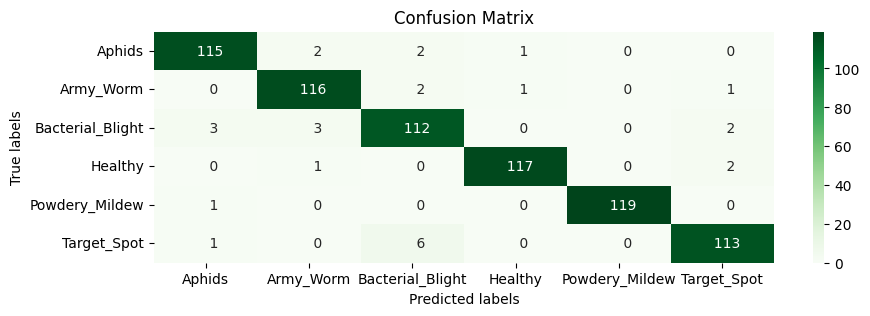

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true class indices
true_classes = test_generator.classes

# Predicted class indices were obtained previously as `predicted_classes_indices`

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes_indices)

# Convert class indices to class names for the confusion matrix
class_names = [index_to_class[i] for i in range(len(index_to_class))]

# Plotting the confusion matrix
plt.figure(figsize=(10, 3))
sns.heatmap(cm, annot=True, fmt='5', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


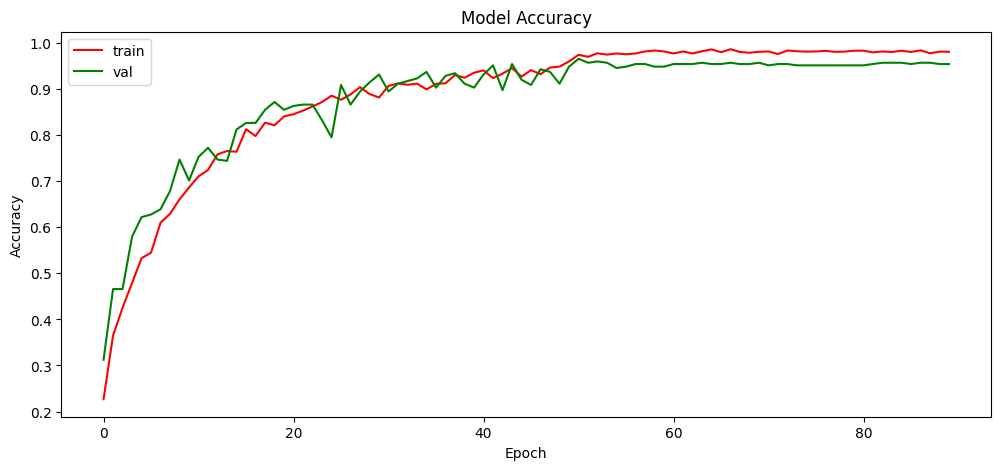

In [5]:
#plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='g')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [6]:
# Save the model to a file
# model.save('my_cnn_model_updated(latest).h5')  # Saves the model in HDF5 format
model.save('/content/drive/My Drive/New_FYP/Model/fyp_model_96_test.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
# files.download('my_cnn_model_updated(latest).h5')
files.download('/content/drive/My Drive/New_FYP/Model/fyp_model_92_test.h5')
